In [1214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load The Dataset

In [1215]:
data = pd.read_csv('customer_churn_large_dataset.csv')

Check Top 5 Records Of Dataset

In [1216]:
print(data.head())

   CustomerID        Name  Age  Gender     Location  \
0           1  Customer_1   63    Male  Los Angeles   
1           2  Customer_2   62  Female     New York   
2           3  Customer_3   24  Female  Los Angeles   
3           4  Customer_4   36  Female        Miami   
4           5  Customer_5   46  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                          17         73.36             236      0  
1                           1         48.76             172      0  
2                           5         85.47             460      0  
3                           3         97.94             297      1  
4                          19         58.14             266      0  


Check The Total No.of Rows and Column of The Dataset

In [1217]:
data.shape

(100000, 9)

In [1218]:
data.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

Check The Datatype of The Dataset

In [1219]:
data.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

Get Basic Statistics of The Dataset

In [1220]:
print(data.describe())

          CustomerID            Age  Subscription_Length_Months  \
count  100000.000000  100000.000000               100000.000000   
mean    50000.500000      44.027020                   12.490100   
std     28867.657797      15.280283                    6.926461   
min         1.000000      18.000000                    1.000000   
25%     25000.750000      31.000000                    6.000000   
50%     50000.500000      44.000000                   12.000000   
75%     75000.250000      57.000000                   19.000000   
max    100000.000000      70.000000                   24.000000   

        Monthly_Bill  Total_Usage_GB          Churn  
count  100000.000000   100000.000000  100000.000000  
mean       65.053197      274.393650       0.497790  
std        20.230696      130.463063       0.499998  
min        30.000000       50.000000       0.000000  
25%        47.540000      161.000000       0.000000  
50%        65.010000      274.000000       0.000000  
75%        82.6400

Total Category And Value of Churn 

In [1221]:
data['Churn'].value_counts()

Churn
0    50221
1    49779
Name: count, dtype: int64

Total Percentage(%) of Each Category

In [1222]:
100*data['Churn'].value_counts()/len(data['Churn'])

Churn
0    50.221
1    49.779
Name: count, dtype: float64

Information of About The "non-null" Object

In [1223]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


Check The Percentage(%) of Missing Value

In [1224]:
missing = pd.DataFrame((data.isnull().sum()) * 100 / data.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)  # Pass 'x' and 'y' explicitly
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()


c:\Users\jr048\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jr048\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jr048\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Null Value Checking

In [1225]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

There Is No Null Value Present

Find The Maximum Age 

In [1226]:
print(data['Age'].max())

70


Group The Age In bins of 10 Months

In [1227]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 70, 12)]

data['Age_group'] = pd.cut(data.Age, range(1, 80, 12), right = False, labels=labels)

In [1228]:
data['Age_group'].value_counts()

Age_group
49 - 60    22816
37 - 48    22688
25 - 36    22568
61 - 72    18815
13 - 24    13113
1 - 12         0
Name: count, dtype: int64

Drop The "CustomerID and Age" Columns

In [1229]:
data.drop(columns= ['CustomerID', 'Age'], axis=1, inplace=True)
data.head()

Name  Gender     Location  Subscription_Length_Months  Monthly_Bill  \
0  Customer_1    Male  Los Angeles                          17         73.36   
1  Customer_2  Female     New York                           1         48.76   
2  Customer_3  Female  Los Angeles                           5         85.47   
3  Customer_4  Female        Miami                           3         97.94   
4  Customer_5  Female        Miami                          19         58.14   

   Total_Usage_GB  Churn Age_group  
0             236      0   61 - 72  
1             172      0   61 - 72  
2             460      0   13 - 24  
3             297      1   25 - 36  
4             266      0   37 - 48

In [1230]:
data.dtypes

Name                            object
Gender                          object
Location                        object
Subscription_Length_Months       int64
Monthly_Bill                   float64
Total_Usage_GB                   int64
Churn                            int64
Age_group                     category
dtype: object

In [1231]:
data

Name  Gender     Location  Subscription_Length_Months  \
0           Customer_1    Male  Los Angeles                          17   
1           Customer_2  Female     New York                           1   
2           Customer_3  Female  Los Angeles                           5   
3           Customer_4  Female        Miami                           3   
4           Customer_5  Female        Miami                          19   
...                ...     ...          ...                         ...   
99995   Customer_99996    Male      Houston                          23   
99996   Customer_99997  Female     New York                          19   
99997   Customer_99998    Male      Chicago                          17   
99998   Customer_99999  Female     New York                          20   
99999  Customer_100000  Female  Los Angeles                          19   

       Monthly_Bill  Total_Usage_GB  Churn Age_group  
0             73.36             236      0   61 - 72  
1             48.76             172      0   61 - 72  
2             85.47             460      0   13 - 24  
3             97.94             297      1   25 - 36  
4             58.14             266      0   37 - 48  
...             ...             ...    ...       ...  
99995         55.13             226      1   25 - 36  
99996         61.65             351      0   61 - 72  
99997         96.11             251      1   61 - 72  
99998         49.25             434      1   49 - 60  
99999         76.57             173      1   25 - 36  

[100000 rows x 8 columns]

In [1232]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender_Binary'] = le.fit_transform(data.Gender)

In [1233]:
data

Name  Gender     Location  Subscription_Length_Months  \
0           Customer_1    Male  Los Angeles                          17   
1           Customer_2  Female     New York                           1   
2           Customer_3  Female  Los Angeles                           5   
3           Customer_4  Female        Miami                           3   
4           Customer_5  Female        Miami                          19   
...                ...     ...          ...                         ...   
99995   Customer_99996    Male      Houston                          23   
99996   Customer_99997  Female     New York                          19   
99997   Customer_99998    Male      Chicago                          17   
99998   Customer_99999  Female     New York                          20   
99999  Customer_100000  Female  Los Angeles                          19   

       Monthly_Bill  Total_Usage_GB  Churn Age_group  Gender_Binary  
0             73.36             236      0   61 - 72              1  
1             48.76             172      0   61 - 72              0  
2             85.47             460      0   13 - 24              0  
3             97.94             297      1   25 - 36              0  
4             58.14             266      0   37 - 48              0  
...             ...             ...    ...       ...            ...  
99995         55.13             226      1   25 - 36              1  
99996         61.65             351      0   61 - 72              0  
99997         96.11             251      1   61 - 72              1  
99998         49.25             434      1   49 - 60              0  
99999         76.57             173      1   25 - 36              0  

[100000 rows x 9 columns]

In [1234]:
data_dummy = data.copy()

For Gender_Binary 1 = Male, 0 = Female

In [1235]:
data_dummy.drop(columns= ['Name','Gender','Location'], axis=1, inplace=True)
data_dummy.head()

Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn Age_group  \
0                          17         73.36             236      0   61 - 72   
1                           1         48.76             172      0   61 - 72   
2                           5         85.47             460      0   13 - 24   
3                           3         97.94             297      1   25 - 36   
4                          19         58.14             266      0   37 - 48   

   Gender_Binary  
0              1  
1              0  
2              0  
3              0  
4              0

In [1236]:
sns.lmplot(data = data_dummy, x='Monthly_Bill', y='Total_Usage_GB', fit_reg=False)

c:\Users\jr048\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [1237]:
Mth = sns.kdeplot(data_dummy.Monthly_Bill[(data_dummy["Churn"] == 0) ],
                  color="Red", shade = True)
Mth = sns.kdeplot(data_dummy.Monthly_Bill[(data_dummy["Churn"] == 1) ],
                  ax = Mth, color="Blue", shade=True)
Mth.legend(["NoChurn", "Churn"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly_Bill')
Mth.set_title('Monthly_Bill_by_Churn')


C:\Users\jr048\AppData\Local\Temp\ipykernel_9612\1596390205.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(data_dummy.Monthly_Bill[(data_dummy["Churn"] == 0) ],
c:\Users\jr048\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jr048\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jr048\AppData\Local\Temp\ipykernel_9612\1596390205.py:3: FutureWarning: 

`shade` is now deprecated in favor of `

Text(0.5, 1.0, 'Monthly_Bill_by_Churn')

In [1238]:
data_dummy

Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  \
0                              17         73.36             236      0   
1                               1         48.76             172      0   
2                               5         85.47             460      0   
3                               3         97.94             297      1   
4                              19         58.14             266      0   
...                           ...           ...             ...    ...   
99995                          23         55.13             226      1   
99996                          19         61.65             351      0   
99997                          17         96.11             251      1   
99998                          20         49.25             434      1   
99999                          19         76.57             173      1   

      Age_group  Gender_Binary  
0       61 - 72              1  
1       61 - 72              0  
2       13 - 24              0  
3       25 - 36              0  
4       37 - 48              0  
...         ...            ...  
99995   25 - 36              1  
99996   61 - 72              0  
99997   61 - 72              1  
99998   49 - 60              0  
99999   25 - 36              0  

[100000 rows x 6 columns]

In [1239]:
data_dummy.dtypes

Subscription_Length_Months       int64
Monthly_Bill                   float64
Total_Usage_GB                   int64
Churn                            int64
Age_group                     category
Gender_Binary                    int32
dtype: object

Convert datatype of "Age_group"-"Category" to float

In [1240]:

data_dummy['Age_group'] = data_dummy['Age_group'].apply(lambda x: (float(x.split('-')[0]) + float(x.split('-')[1])) / 2 if '-' in x else float(x))

data_dummy['Age_group'] = data_dummy['Age_group'].astype(float)

print(data_dummy)

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  \
0                              17         73.36             236      0   
1                               1         48.76             172      0   
2                               5         85.47             460      0   
3                               3         97.94             297      1   
4                              19         58.14             266      0   
...                           ...           ...             ...    ...   
99995                          23         55.13             226      1   
99996                          19         61.65             351      0   
99997                          17         96.11             251      1   
99998                          20         49.25             434      1   
99999                          19         76.57             173      1   

       Age_group  Gender_Binary  
0           66.5              1  
1           66.5              0  
2        

In [1241]:
data_dummy.dtypes

Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
Age_group                     float64
Gender_Binary                   int32
dtype: object

<Axes: >

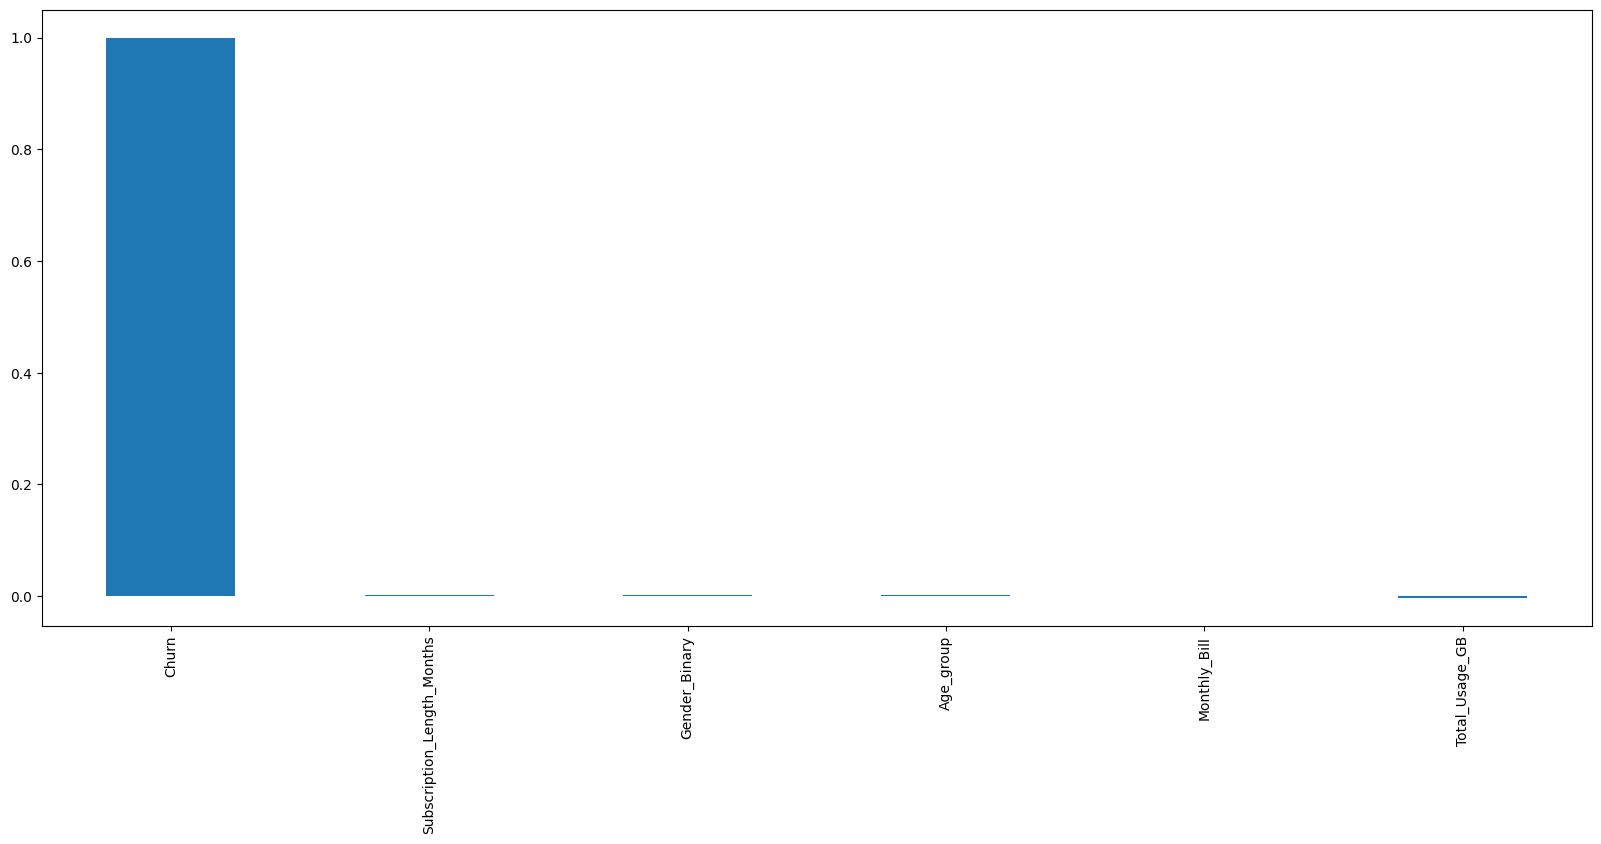

In [1242]:
plt.figure(figsize=(20,8))
data_dummy.corr()['Churn'].sort_values(ascending = False).plot(kind= 'bar')

In [1243]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dummy.corr(), cmap="Paired")

<Axes: >

Bivariate Analysis

In [1244]:
new_df1_target0=data_dummy.loc[data_dummy["Churn"]==0]
new_df1_target1=data_dummy.loc[data_dummy["Churn"]==1]

In [1254]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show

c:\Users\jr048\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jr048\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jr048\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


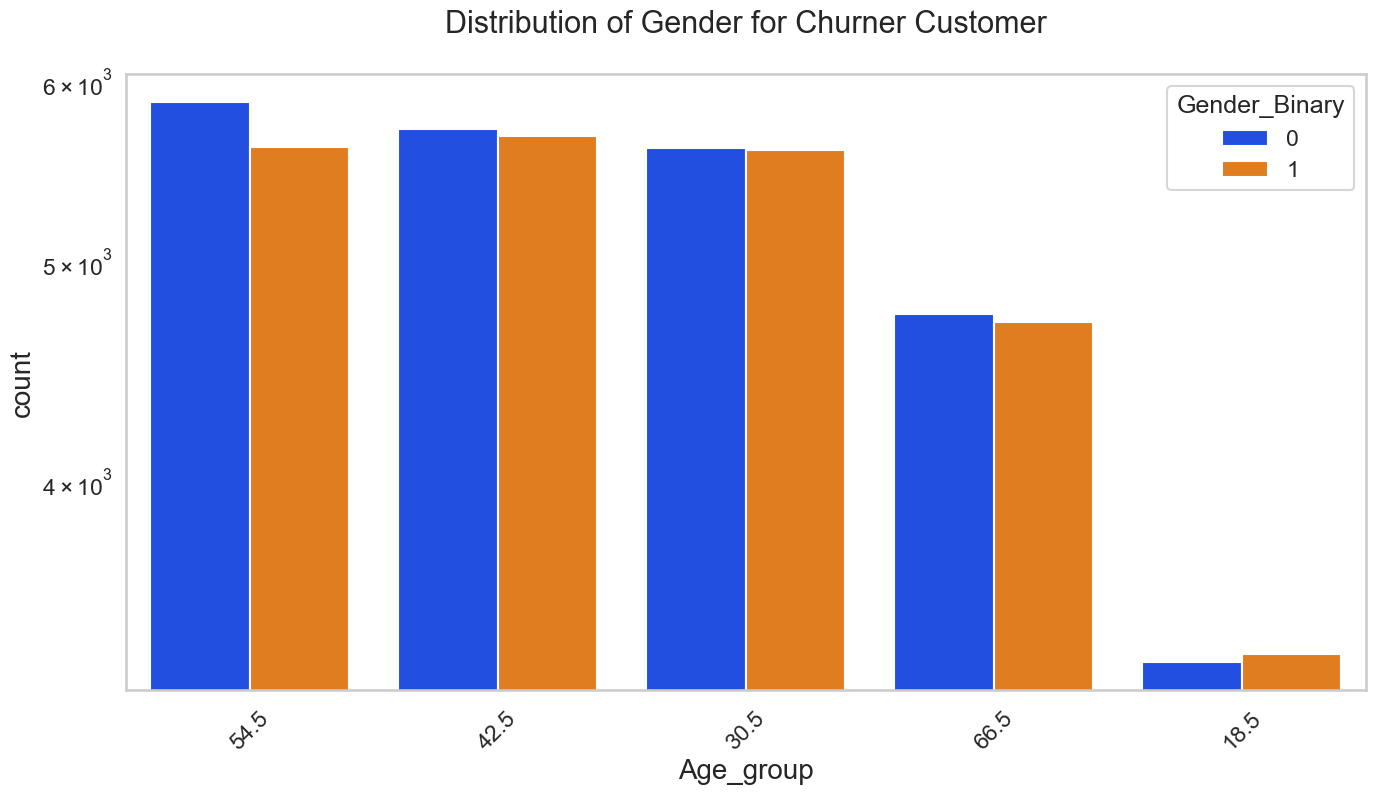

In [1261]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Gender for Churner Customer',hue='Gender_Binary')

c:\Users\jr048\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jr048\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jr048\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


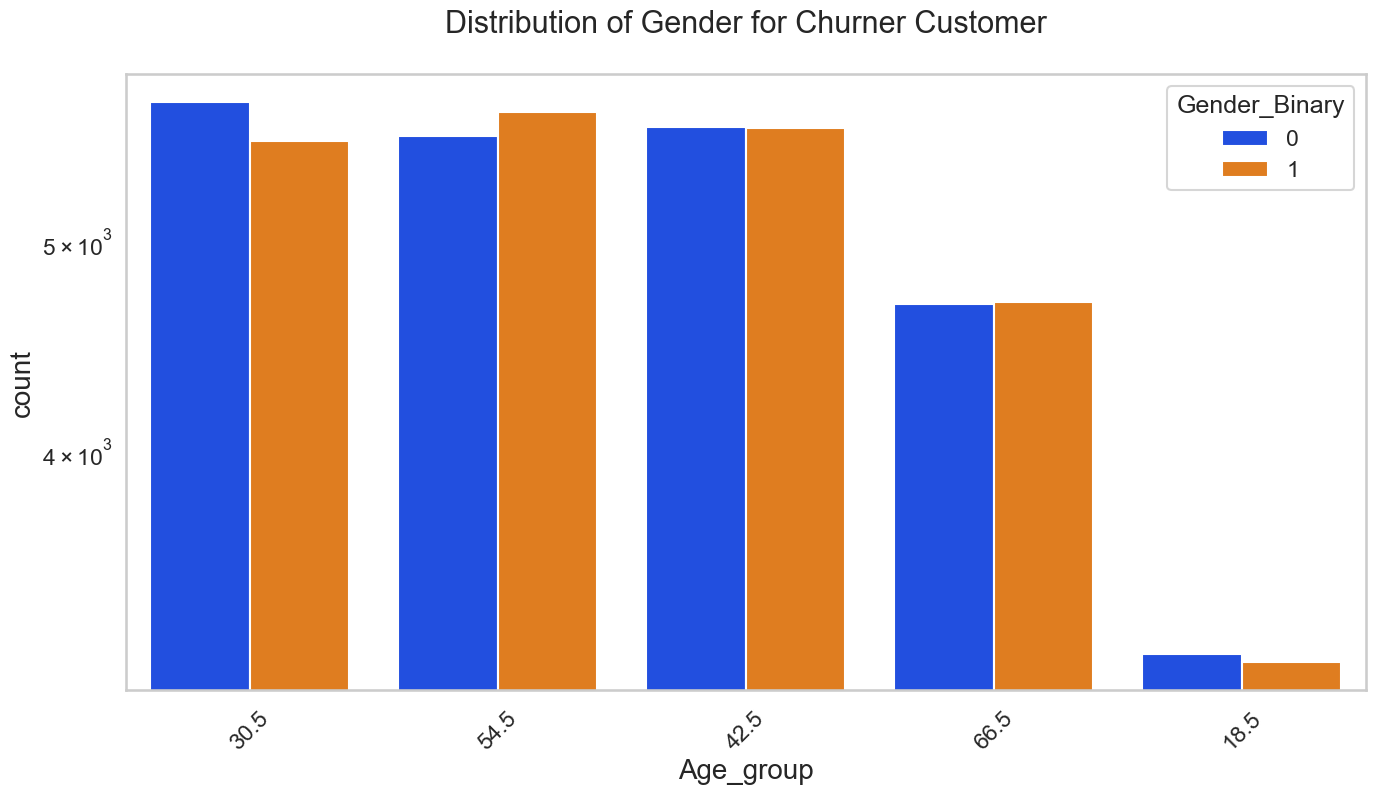

In [1262]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Gender for Churner Customer',hue='Gender_Binary')

Conclusion

There are some insights from this EDA

1. The age between 25-36 have Maxmimum Churn

2. The age between 13-24 have Lowest Churn

3. In The Both of Churn Cases Female Quantity Is More Than Male

In [1263]:
data_dummy.to_csv('data_churn.csv')